DNA Sequencing Classifier using K mer Counting

In [1]:
#importing Common Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Basic analysis of given dataset
data = pd.read_table("human_data.txt")
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
sequence    4380 non-null object
class       4380 non-null int64
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


sequence    object
class        int64
dtype: object

In [3]:
data.head(5)

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [4]:
#feature engineering to convert the DNA sequence to a fixed ength vecotr called K-mer
size = int(input())
def Kmers(sequence,size=6):
    return[sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

    

6


In [5]:
data['words'] = data.apply(lambda x: Kmers(x['sequence']),axis=1)
data=data.drop('sequence',axis=1)
#Dropping the intital sequence after modification

In [6]:
data.head(10)

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
5,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
6,3,"[atgaag, tgaaga, gaagat, aagatt, agattg, gattg..."
7,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
8,3,"[atgaag, tgaaga, gaagat, aagatt, agattg, gattg..."
9,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."


In [7]:
#separating the K mers so that, we get distinct gene codlets, which makes easy to identitfy the errors and critical points in the Geneome
text_data=list(data['words'])
for i in range(len(text_data)):
    text_data[i]=' '.join(text_data[i])

In [8]:
print(text_data[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [9]:
#Allocating data to the testing and training of model
y_data = data.iloc[:,0].values
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

Considering the Genomic sequence as a Language, we interrupt the codlets as words so that, using NLP we bag them into clusters for processing

In [10]:

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(ngram_range=(4,4))
x=CV.fit_transform(text_data)
print(x.shape)

(4380, 232414)


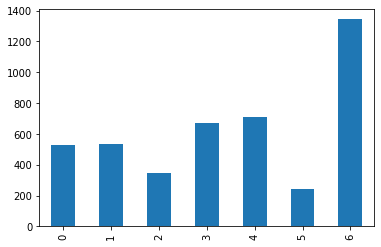

In [11]:
data['class'].value_counts().sort_index().plot.bar()

Spliiting the data into testing and training set to perform analysis of given DNA sequences 

In [12]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x,y_data, test_size=.20,random_state=40)

In [13]:
print(x_test.shape)
print(x_train.shape)

(876, 232414)
(3504, 232414)


using Multinomial Bayes claassifier with grid value of 1 (obtained from various experiments)

In [14]:
#multinomial bayes classifier
from sklearn.naive_bayes import MultinomialNB
MNB  = MultinomialNB(alpha = 0.1)
MNB.fit(x_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [15]:
y_pred = MNB.predict(x_test)

User defined function to calculate the accuracy of the model deployed. 

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Confusion Matrix\n')
print(pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_pred, name ='predicted')))
def get_metric(y_test,y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1
accuracy,precision, recall, f1 = get_metric(y_test, y_pred)
print('\nAccuracy Score = %.3f\nPrecision Score = %.3f\nRecall Score = %.3f\nF1 Score = %.3f'% (accuracy,precision, recall, f1))

Confusion Matrix

predicted    0    1   2    3    4   5    6
Actual                                    
0          113    0   0    0    0   0    0
1            1  115   0    0    0   0    4
2            0    0  62    0    0   0    3
3            0    0   0  121    1   0    1
4            1    0   0    0  149   0    2
5            2    0   0    0    0  37    1
6            0    0   0    0    0   0  263

Accuracy Score = 0.982
Precision Score = 0.982
Recall Score = 0.982
F1 Score = 0.982


Inference:
1. from the given dataset, It is evident that the classes which the DNA Sequences are labled are essential factors while forming the k mers. 
2. The model didn't overfit/underfit with the dataset, as the score of accuracy is moderatly high for unseen data. 
3. Depending on the gene/codon sequence to be mapped, the lenth of K mer can be changed to any arbitrary whole number resulting in different sequences/combinations. 
4. The above methid is usefull in finding the critical points in DNA sequences such as binding and transcription sites.  